# Assignment 0

In [171]:
import pandas as pd
import numpy as np
from numpy import linalg as LNG
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import BoundaryNorm, ListedColormap
import umap

np.random.seed(42)

# Supress deprecation warnings
import warnings
warnings.filterwarnings('error', category=DeprecationWarning) 

In [172]:
# Training inputs (image as vector)
X_train = pd.read_csv("data/train_in.csv").to_numpy()

# Training outputs (number that each vector represents)
Y_train = pd.read_csv("data/train_out.csv").to_numpy()

X_test = pd.read_csv("data/test_in.csv").to_numpy()
Y_test = pd.read_csv("data/test_out.csv").to_numpy()

## Calculating the center for each cloud c_d

In [173]:
def get_digit_cloud(X, Y, digit):
    # Finding all the indexes from Y_train_out related to digit
    d_indices = np.where(Y == digit)[0]

    # an array of all images related to the current d
    return X[d_indices]

In [174]:
# Stores calculated centers
# Label corresponds to index, eg. Center_0 = clouds[0]
cloud_centers = []

for d in range(10):
    cloud_d = get_digit_cloud(X_train, Y_train, d)

    # Calculating the mean/center of each cloud
    center_d = np.mean(cloud_d, axis=0)

    # add each mean vector to clouds
    cloud_centers.append(center_d)

## Calculating center distances for each digit/label

In [175]:
distances_matrix = np.full((10,10), np.NaN)

for row_index in range(0,10):
    for column_index in range(0,10):
        if column_index == row_index or not np.isnan(distances_matrix[column_index, row_index]):
            continue

        c1 = cloud_centers[row_index]
        c2 = cloud_centers[column_index]
        
        distances_matrix[row_index, column_index] = LNG.norm(c1 - c2)

In [176]:
pd.DataFrame(distances_matrix)

,0,1,2,3,4,5,6,7,8,9
0,NaN,14.449608,9.334556,9.143734,10.769844,7.519296,8.163019,11.864555,9.907902,11.488875
1,NaN,NaN,10.125323,11.733233,10.173786,11.118800,10.597933,10.743154,10.086777,9.932094
2,NaN,NaN,NaN,8.178285,7.932541,7.906796,7.317952,8.872531,7.077516,8.887748
3,NaN,NaN,NaN,NaN,9.087608,6.118750,9.292426,8.922401,7.020425,8.354350
4,NaN,NaN,NaN,NaN,NaN,8.001517,8.765997,7.583012,7.380909,6.010408
5,NaN,NaN,NaN,NaN,NaN,NaN,6.688629,9.211954,6.967386,8.258538
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.868157,8.570208,10.419744
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.467785,5.426474
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.401166
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Classificating new vectors

In [177]:
def classify(new_vector):
    distances_to_clouds = [LNG.norm(new_vector-center) for center in cloud_centers]

    # Returns the label for the first closest cloud
    return np.argmin(distances_to_clouds)

## Running model on test set to check accuracy

In [178]:
correct = 0

for x_test, y_test in zip(X_test, Y_test):
    # feed input to model
    y_predict = classify(x_test)

    if y_predict == y_test:
        correct+=1

accuracy = correct / X_test.shape[0] * 100

print(f"Accuracy: {accuracy}%")

Accuracy: 80.38038038038037%


## Dimensionality Reduction

### PCA

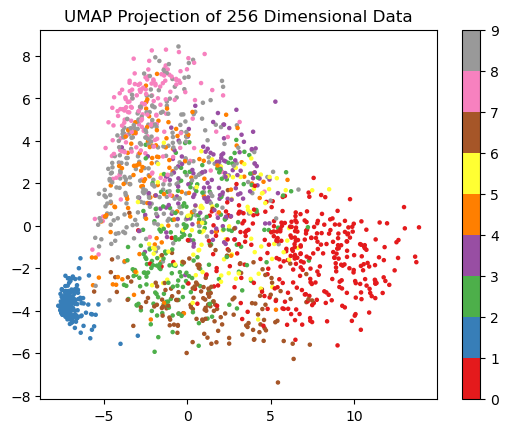

In [179]:
# Initiaze PCA
n_components = 2 # number of dimensions to be plotted

pca = PCA(n_components=n_components, random_state=42)
clouds_PCA = pca.fit_transform(X_train)
plt.scatter(clouds_PCA[:, 0], clouds_PCA[:, 1], c=Y_train, cmap='Set1', s=5)
plt.colorbar()
plt.title("UMAP Projection of 256 Dimensional Data")
plt.show()
    

### U-MAP

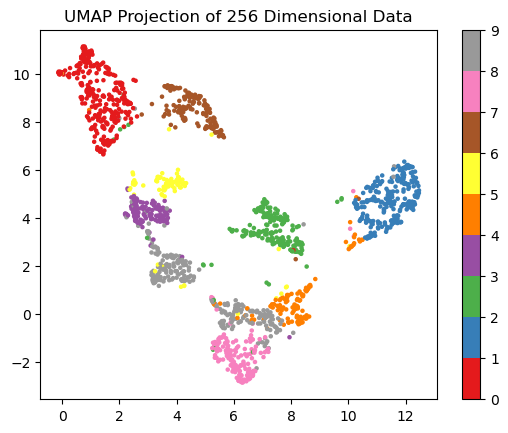

In [180]:
# initialize UMAP
umap_reducer = umap.UMAP(random_state=42)

# Fit PCA model to vectors
clouds_umap = umap_reducer.fit_transform(X_train)
plt.scatter(clouds_umap[:, 0], clouds_umap[:, 1], c=Y_train, cmap='Set1', s=5)
plt.colorbar()
plt.title("UMAP Projection of 256 Dimensional Data")
plt.show()

In [182]:
def compare_clouds(d1, d2):
    cloud_d1 = get_digit_cloud(X_train, Y_train, d1)
    cloud_d2 = get_digit_cloud(X_train,Y_train, d2)

    cloud = np.concatenate((cloud_d1, cloud_d2))
    cloud_umap = umap_reducer.fit_transform(cloud)

    labels = [d1 for i in range(cloud_d1.shape[0])] + [d2 for i in range(cloud_d2.shape[0])]
    unique_labels = set(labels)

    scatter = plt.scatter(cloud_umap[:,0], cloud_umap[:,1],c=labels, cmap=ListedColormap(['red', 'blue']))

    # Add a colorbar with custom class labels
    cbar = plt.colorbar(scatter, ticks=list(unique_labels))
    cbar.set_ticklabels(unique_labels)
    cbar.set_label('Digits')

    plt.show()